# Assignment 3
## Question 1
Download the rock paper sissors data.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# download and extract rps data
tarball_path = "rps-data.tgz"
if not Path(tarball_path).is_file():
  url = "https://github.com/RochX/comp486-assignments/raw/main/assignment3/rps-data.tgz"
  urllib.request.urlretrieve(url, "rps-data.tgz")
  with tarfile.open(tarball_path) as rps_tarball:
    rps_tarball.extractall()

## Question 2

Convert the images into a csv file using the provided code.

We run `rm rps-training-data.csv` to delete the file if it already exists, since the provided code simply appends to this file.
If we don't delete it initialially, we can get duplicate data.

In [2]:
!rm rps-training-data.csv

rm: cannot remove 'rps-training-data.csv': No such file or directory


In [3]:
import csv
import numpy as np
import os
from PIL import Image, UnidentifiedImageError

def createFileList(myDir, format='.png'):
  fileList = []
  print(myDir)
  labels = []
  names = []
  keywords = {"paper": "1","rock": "2","scissors":"3"} # keys and values to be changed as needed
  for root, dirs, files in os.walk(myDir, topdown=True):
    for name in files:
      if name.endswith(format):
        fullName = os.path.join(root, name)
        fileList.append(fullName)
      for keyword in keywords:
        if keyword in name:
          labels.append(keywords[keyword])
        else:
          continue
      names.append(name)
  return fileList, labels, names

# load the original image
myFileList, labels, names = createFileList("rps-data/rps-training-set")
i = 0

failed_files = []
for file in myFileList:
  try:
    img_file = Image.open(file)
    #img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))
    value = value.flatten()
    value = np.append(value,labels[i])
    i +=1
    #print(value)
    with open("rps-training-data.csv", 'a') as f:
      writer = csv.writer(f)
      writer.writerow(value)
  except UnidentifiedImageError:
    failed_files.append(file)

print(f"Number of failed files: {len(failed_files)} out of {len(myFileList)}")
with open("failed_files.log", "w") as log_file:
  for file in failed_files:
    log_file.write(file + "\n")

rps-data/rps-training-set


<ipython-input-3-b589c28154ea>:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))


Number of failed files: 0 out of 2520


## Question 3
Use `read_csv` in `pandas` to read the CSV file and assign it to a variable and print it.

In [4]:
rps_training_data = pd.read_csv("rps-training-data.csv", header=None)
# rename the label column to be clearly distinguish between the image data and label
rps_training_data = rps_training_data.rename(columns={2304: "RPS Label"})
rps_training_data

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
0,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,2
1,253,253,253,253,253,253,253,253,253,252,...,246,247,247,248,248,249,249,249,250,2
2,253,253,253,253,253,253,253,253,253,253,...,246,246,246,247,247,247,248,248,249,2
3,253,253,253,253,253,253,253,253,253,253,...,247,247,248,248,249,249,249,250,250,3
4,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,253,253,253,253,253,253,253,253,253,253,...,248,248,248,249,249,249,249,249,250,2
2516,254,254,254,254,253,254,253,253,253,253,...,247,247,248,248,248,248,249,249,249,3
2517,254,254,254,253,254,253,253,253,253,253,...,246,246,247,247,247,248,248,248,249,3
2518,253,253,253,253,253,253,253,253,253,252,...,246,247,247,248,248,248,248,249,249,1


## Question 4
Choose two methods to discover the data.

In [5]:
# get the set of values for the last column
rps_training_data["RPS Label"].value_counts()

2    840
3    840
1    840
Name: RPS Label, dtype: int64

In [6]:
rps_training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,...,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,253.978968,253.918254,253.816270,253.828571,253.794444,253.774206,253.782540,253.759524,253.724603,253.646429,...,236.407937,246.196429,249.318651,250.092857,250.341667,250.487302,250.548810,250.905952,251.093651,2.000000
std,0.884763,0.915041,0.955113,0.950949,0.962068,0.966391,0.972188,0.991482,1.027002,1.108982,...,45.437036,24.461682,8.978231,3.190291,2.913251,2.816584,2.712943,2.477105,2.285142,0.816659
min,253.000000,253.000000,253.000000,253.000000,253.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,0.000000,0.000000,0.000000,219.000000,246.000000,246.000000,247.000000,247.000000,247.000000,1.000000
25%,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,246.000000,247.000000,247.000000,248.000000,248.000000,248.000000,248.000000,249.000000,249.000000,1.000000
50%,254.000000,254.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,247.000000,248.000000,248.000000,249.000000,249.000000,249.000000,249.000000,250.000000,250.000000,2.000000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,3.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,254.000000,254.000000,254.000000,3.000000


## Question 5
Make sure your training data is shuffled.

In [7]:
from sklearn.utils import shuffle

rps_training_data_shuffled = shuffle(rps_training_data, random_state=42)

rps_training_data_shuffled

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
196,253,253,253,253,253,253,253,253,253,252,...,246,246,246,247,247,248,248,248,249,2
986,253,253,253,253,253,253,253,253,253,253,...,248,248,248,249,249,249,249,250,250,2
1090,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
387,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
2221,253,253,253,253,253,253,253,253,253,253,...,247,247,247,247,247,248,248,249,249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,254,253,254,254,254,253,253,253,253,253,...,247,247,248,248,248,248,249,249,249,3
1095,254,253,253,253,253,253,253,254,253,253,...,247,247,248,248,248,248,248,249,249,3
1130,254,254,253,253,253,253,253,253,253,253,...,246,246,247,247,248,248,248,249,249,3
1294,253,253,253,253,253,253,253,253,253,253,...,247,247,248,248,249,249,249,250,250,3


## Question 6
Separate the predictors (`rpsPredictors`) and the labels (`rpsLabels`) in the training set

In [8]:
rps_training_predictors = rps_training_data_shuffled.drop("RPS Label", axis=1)
rps_training_labels = rps_training_data_shuffled["RPS Label"]

In [9]:
rps_training_predictors.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
196,253,253,253,253,253,253,253,253,253,252,...,245,246,246,246,247,247,248,248,248,249
986,253,253,253,253,253,253,253,253,253,253,...,248,248,248,248,249,249,249,249,250,250
1090,255,255,255,255,255,255,255,255,255,255,...,253,254,254,254,254,254,254,254,254,254
387,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254
2221,253,253,253,253,253,253,253,253,253,253,...,246,247,247,247,247,247,248,248,249,249


In [10]:
rps_training_labels.head()

196     2
986     2
1090    1
387     1
2221    1
Name: RPS Label, dtype: int64

## Question 7
Display an instance's feature vector using `matplotlib`'s `imshow()` function and
check the label for that image. (If the picture is paper, then the label should be 1, if the
picture is a rock, then the label should be 2, and if the picture is scissors, then the label
should be 3)

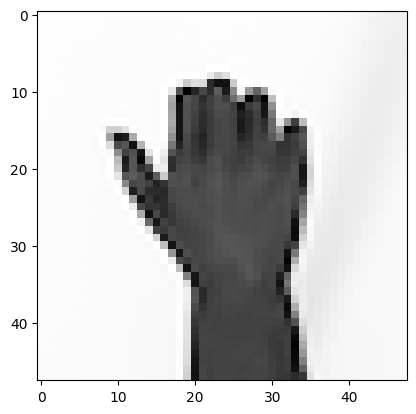

In [11]:
import matplotlib.pyplot as plt

def plot_rps(image_data):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# get instance with index, then display the image in grey-scale and get its label
index = 0
instance = rps_training_predictors.iloc[[index]]
label = rps_training_labels.iloc[[index]]

plot_rps(instance)
plt.show()

## Question 8
Train a binary classifier (a stochastic gradient descent (SGD)), to distinguish between just two classes, paper, and non-paper.

In [12]:
paper_train_labels = (rps_training_labels == 1)
paper_train_labels

196     False
986     False
1090     True
387      True
2221     True
        ...  
1638    False
1095    False
1130    False
1294    False
860     False
Name: RPS Label, Length: 2520, dtype: bool

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf_paper = SGDClassifier(random_state=42)
sgd_clf_paper.fit(rps_training_predictors, paper_train_labels)

SGDClassifier(random_state=42)

## Question 9
Try to feed your model with some instants and **explain** the output.

In [14]:
rps_training_predictors[:8]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
196,253,253,253,253,253,253,253,253,253,252,...,245,246,246,246,247,247,248,248,248,249
986,253,253,253,253,253,253,253,253,253,253,...,248,248,248,248,249,249,249,249,250,250
1090,255,255,255,255,255,255,255,255,255,255,...,253,254,254,254,254,254,254,254,254,254
387,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254
2221,253,253,253,253,253,253,253,253,253,253,...,246,247,247,247,247,247,248,248,249,249
168,255,255,255,255,255,255,255,255,255,255,...,178,255,252,254,254,254,254,254,254,254
1378,253,253,253,253,253,253,253,252,252,252,...,246,246,247,247,248,248,249,249,250,250
2462,254,253,253,253,253,253,253,253,253,253,...,247,247,247,247,248,248,248,248,249,249


In [15]:
rps_training_labels[:8]

196     2
986     2
1090    1
387     1
2221    1
168     1
1378    1
2462    3
Name: RPS Label, dtype: int64

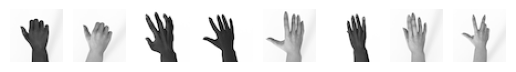

In [16]:
import matplotlib.pyplot as plt

rps_training_example_instances = rps_training_predictors[:8]

plot_rows, plot_columns = 1, len(rps_training_example_instances)

def subplot_rps(image_data, index):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.subplot(plot_rows, plot_columns, index)
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  plt.axis("off")


for i in range(len(rps_training_example_instances)):
  subplot_rps(rps_training_predictors.iloc[[i]], i+1)


plt.show()

In [17]:
sgd_clf_paper.predict(rps_training_example_instances)

array([False, False,  True,  True,  True,  True,  True, False])

The result of `sgd_clf_paper.predict(rps_training_example_instances)` tells us that the binary classifier determined that images 3, 4, 5, 6, 7 are all paper while the rest are not paper.

## Question 10
Use the `cross_val_score()` function to evaluate your SGDClassifier model, using $k$-fold cross-validation with five folds. **Write** your observations.

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_paper, rps_training_predictors, rps_training_labels, cv=5, scoring="accuracy")

array([0.98412698, 0.99801587, 0.98809524, 0.98611111, 0.99603175])

The results of the `cross_val_score()` function with 5 folds tells us that the model is at least 98% accurate across all different folds.

## Question 11
Compute the confusion matrix for your classifier and **explain** the output.

In [19]:
from sklearn.model_selection import cross_val_predict

rps_training_paper_predictions = cross_val_predict(sgd_clf_paper, rps_training_predictors, paper_train_labels, cv=5)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(paper_train_labels, rps_training_paper_predictions)

array([[1651,   29],
       [ 123,  717]])

The confusion matrix tells us the following:
- There are 1,651 instances that are not paper which the model correctly predicted.
- There are 29 instances that are not paper which the model incorrectly predicted to be paper.
- There are 123 instances that are paper which the model incorrectly predicted to not be paper.
- There are 717 instances that are paper which the model correctly predicted.

## Question 12
Calculate precision score, recall score and F1 score.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(paper_train_labels, rps_training_paper_predictions)

0.9611260053619303

In [22]:
recall_score(paper_train_labels, rps_training_paper_predictions)

0.8535714285714285

In [23]:
f1_score(paper_train_labels, rps_training_paper_predictions)

0.9041614123581336

## Question 13
Use `matplotlib` to plot precision and recall as functions of the threshold value.
**Write** your observations.

In [24]:
paper_scores = cross_val_predict(sgd_clf_paper, rps_training_predictors, paper_train_labels, cv=5, method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(paper_train_labels, paper_scores)

thresholds.min(), thresholds.max()

(-59699285.80522522, 34084847.73536924)

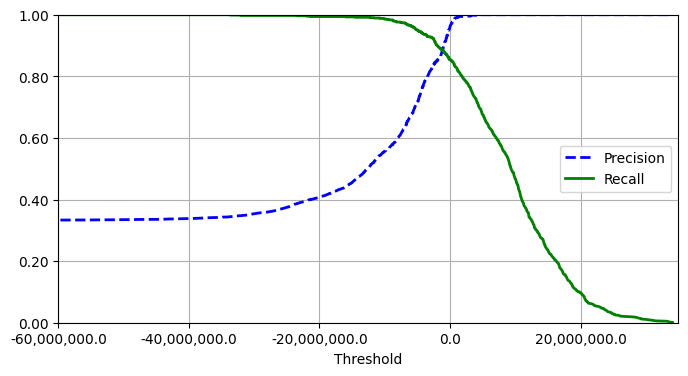

In [54]:

plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# visual changes
plt.axis([-60000000, 35000000, 0, 1])
plt.ticklabel_format(style='plain')

# get current axis
ax = plt.gca()
ax.set_xlabel('Threshold')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:,}'.format(x))) # thousands comma seperator on x-axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points on y-axis

plt.grid()
plt.legend(loc="center right")

plt.show()

When the threshold is positive, our precision approaches 100%.
A precision of 100% would mean that the model does not incorrectly classify rock or scissors as paper.

When the threshold is less than -20,000,000, our recall is nearly 100%.
A recall of 100% would mean that the model does not incorrectly classify paper as rock or scissors.

## Question 14
For what threshold you can get 95% precision?

In [27]:
threshold = 0.95

In [28]:
idx_for_threshold_precision = (precisions >= threshold).argmax()
desired_precision_threshold = thresholds[idx_for_threshold_precision]
desired_precision_threshold

-185113.77152567988

A threshold of `-185113` gives 95% precision.
The plot below shows this threshold.
Note the change of scale in the $x$-axis compared to the previous plot.

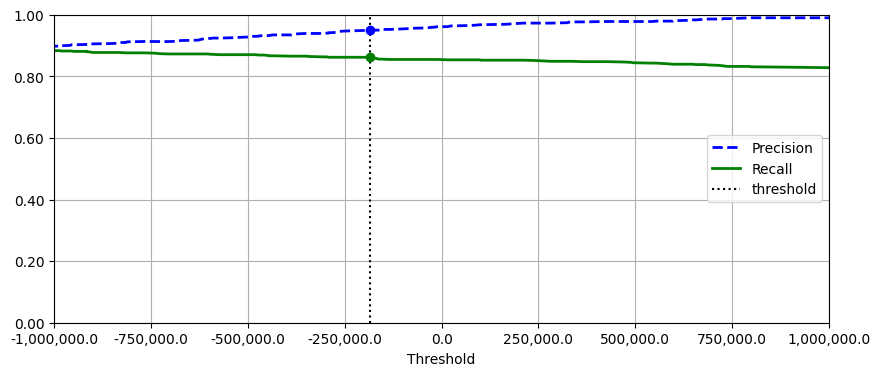

In [53]:
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
plt.figure(figsize=(10, 4))

# plot data and the threshold that gives us 95% precision
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(desired_precision_threshold, 0, 1.0, "k", "dotted", label="threshold")

# visual changes
plt.plot(thresholds[idx_for_threshold_precision], precisions[idx_for_threshold_precision], "bo")
plt.plot(thresholds[idx_for_threshold_precision], recalls[idx_for_threshold_precision], "go")
plt.axis([-1000000, 1000000, 0, 1])
plt.ticklabel_format(style='plain')

# get current axis
ax = plt.gca()
ax.set_xlabel('Threshold')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:,}'.format(x))) # thousands comma seperator on x-axis
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set two decimal points on y-axis

plt.grid()
# plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

## Question 15
plot the ROC curve (FPR against the TPR) using `matplotlib` then Calculate the area under the curve (AUC). Is your classifier perfect? Why?

## Question 16
Train an SGDClassifier on a multiclass dataset and use it to make predictions.

## Question 17
Plot the confusion matrix for your multiclass classifier and **explain** the output.

## Question 18
Plot Confusion matrix with errors only, normalized by row and confusion matrix with errors only by column. **Explain one output for each.**